In [13]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [14]:
#Función para crear el estado de Bell O1.
def crear_estado_bell01(qc, a, b):
    qc.x(a) # Aplica una puerta X al primer qubit
    qc.h(a) # Aplica una puerta H al primer qubit
    qc.cx(a,b) # Aplica una puerta CNOT, usando el primer qubit como control

In [15]:
# Define una función que recibe un QuantumCircuit (qc)
# un índice de qubit (qubit) y un mensaje en forma de string (msg)
def Alice_codificar_mensaje(qc, qubit, msg):
    if msg == "01":
        pass    # Para enviar 01 no se hace nada.
    elif msg == "11":
        qc.x(qubit) # Para enviar 11 se aplica una compuerta X.
    elif msg == "00":
        qc.z(qubit) # Para enviar 00 se aplica una compuerta Z.
    elif msg == "10":
        qc.z(qubit) # Para enviar 10 se aplica una compuerta Z
        qc.x(qubit) # seguida de una compuerta X.
    else:
        print("Mensaje invalido: Se enviará '01'")

In [16]:
# Función mediante la cual Bob recibe el estado cuántico enviado
# por Alice, y lo decodifica junto con su qubit entrelazado a fin 
# de recuperar el mensaje clásico en dos bits de información.
def Bob_decodificar_mensaje(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

    Bob_m0 = ClassicalRegister(1, "Bob_m0")
    Bob_m1 = ClassicalRegister(1, "Bob_m1")
    qc.add_register(Bob_m1)
    qc.add_register(Bob_m0)

    qc.barrier()

    qc.measure(a, Bob_m1)
    qc.measure(b, Bob_m0)

In [ ]:
# Crea el registro cuántico con 2 qubits (Uno para Alice, uno para Bob.)
entrelaz_qbit0 = QuantumRegister(1, "A")
entrelaz_qbit1 = QuantumRegister(1, "B")

# Crea el circuito cuántico para el Protocolo de Codificación Superdensa
Circuito_cod_superdensa = QuantumCircuit(entrelaz_qbit0, entrelaz_qbit1)

In [18]:
crear_estado_bell01(Circuito_cod_superdensa, entrelaz_qbit0 , entrelaz_qbit1)

Circuito_cod_superdensa.barrier() # Esto agrega un separador al circuito. 
             # Dicho separador divide las compuertas en el diagrama del circuito 
             # dejando claro qué parte del circuito corresponde a cada etapa.

# En este punto, el qubit 0 va a Alice y el qubit 1 va a Bob.

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [19]:
# A continuación, Alice codifica su mensaje en el qubit 0. En este caso,
# se desea enviar el mensaje '11'.

mensaje_de_alice = "11"

In [ ]:
Alice_codificar_mensaje(Circuito_cod_superdensa, entrelaz_qbit0, mensaje_de_alice)

# Luego de esta codificación, Alice envía su qubit a Bob.
Circuito_cod_superdensa.barrier()
Circuito_cod_superdensa.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [21]:
# Después de recibir el qubit 0, Bob aplica el protocolo de recuperación del mensaje clásico:
Bob_decodificar_mensaje(Circuito_cod_superdensa, entrelaz_qbit0, entrelaz_qbit1)

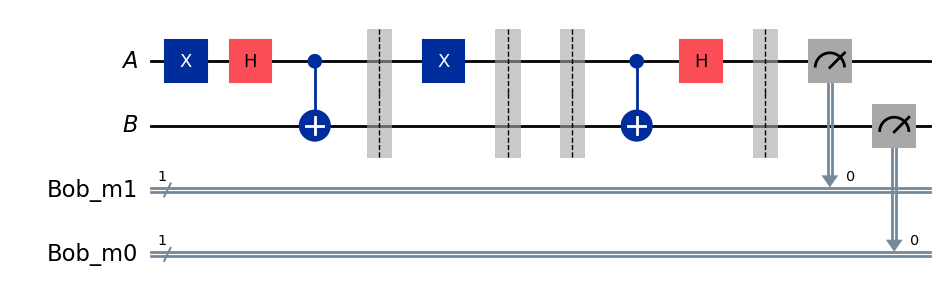

In [22]:
# Dibujo del circuito resultante:
Circuito_cod_superdensa.draw(output = "mpl")

In [23]:
# Definición del simulador requerido.
circuit_simulator = AerSimulator()

La medida final fue 1 1, con una frecuencia de conteos de 1024.


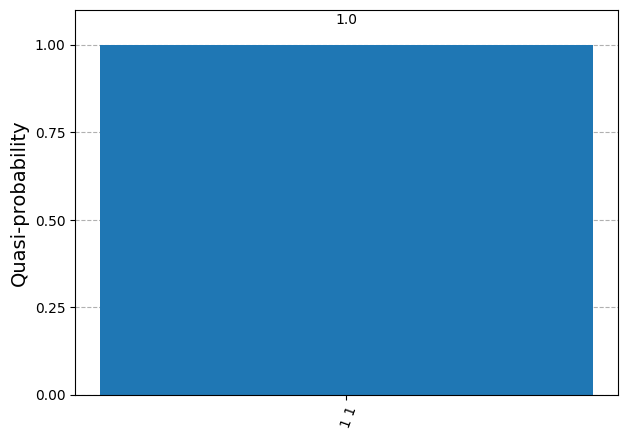

In [24]:
sim_result = circuit_simulator.run(Circuito_cod_superdensa).result()

measurement_result = sim_result.get_counts(Circuito_cod_superdensa)

for outcome, frequency in measurement_result.items():
    print(f"La medida final fue {outcome}, con una frecuencia de conteos de {frequency}.")

plot_distribution(measurement_result)

In [25]:
from qiskit import __version__
print(__version__)

1.3.2
